In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from lmfit import Parameters, Minimizer, minimize, report_fit

import scqubits as scq

In [3]:
def func(pars, x, data=None):
    a, b, c = pars['a'], pars['b'], pars['c']
    fluxonium = scq.Fluxonium(EJ = a,
                            EC = b,
                            EL = c,
                            flux = 0.33,
                            cutoff = 110)
    specdata = fluxonium.get_spectrum_vs_paramvals('flux',
                                                  x,
                                                  evals_count = 4,
                                                  subtract_ground = True)
    model = specdata.energy_table
    if data is None:
        return model
    return model - data


def f(var, x):
    fluxonium = scq.Fluxonium(EJ = var[0],
                            EC = var[1],
                            EL = var[2],
                            flux = 0.33,
                            cutoff = 110)
    specdata = fluxonium.get_spectrum_vs_paramvals('flux',
                                                  x,
                                                  evals_count = 4,
                                                  subtract_ground = True)
    return specdata.energy_table


params = Parameters()
params.add('a', value=1)
params.add('b', value=1)
params.add('c', value=0.1, min = 0.1, max = 1)

a, b, c = 8.9, 2.5, 0.5
x = np.linspace(0, 50, 50)
y = f([a, b, c], x)
data = y + 0.25*np.random.normal(size=y.shape)

# fit without analytic derivative
min1 = Minimizer(func, params, fcn_args=(x,), fcn_kws={'data': data})
out1 = min1.leastsq()
fit1 = func(out1.params, x)

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

In [5]:
print('''
"true" parameters are: a = %.3f, b = %.3f, c = %.3f

==================================
Statistic/Parameter|   Without   |
----------------------------------
N Function Calls   |   %3i       |
Chi-square         |   %.4f    |
   a               |   %.4f    |
   b               |   %.4f    |
   c               |   %.4f    |
--------------------------------
''' % (a, b, c, 
       out1.nfev,
       out1.chisqr,
       out1.params['a'],
       out1.params['b'],
       out1.params['c'],))


"true" parameters are: a = 8.900, b = 2.500, c = 0.500

Statistic/Parameter|   Without   |
----------------------------------
N Function Calls   |    26       |
Chi-square         |   13.7329    |
   a               |   8.8534    |
   b               |   2.5453    |
   c               |   0.4995    |
--------------------------------



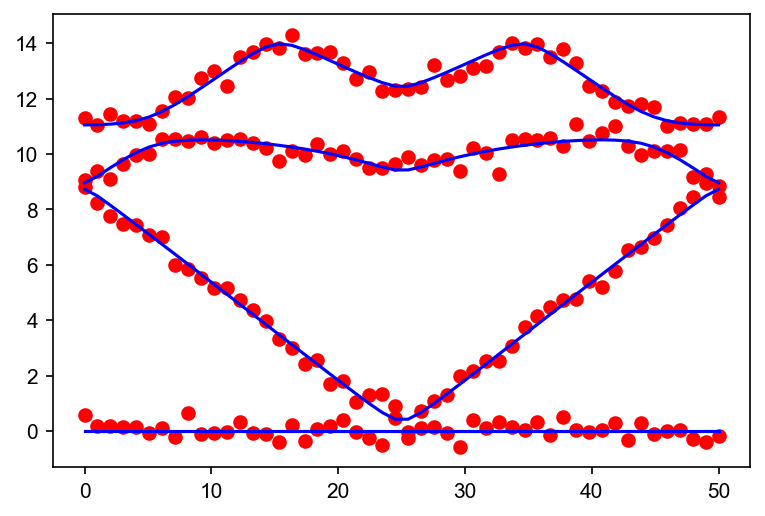

In [6]:
plt.plot(x, data, 'ro')
plt.plot(x, fit1, 'b')
plt.show()

In [15]:
scq.GUI()

Output(layout=Layout(width='975px'))